### Context ###

The data consists of measurements made on patients with malignant melanoma. Each patient
had their tumour removed by surgery at the Department of Plastic Surgery, University Hospital
of Odense, Denmark during the period 1962 to 1977. The surgery consisted of complete
removal of the tumour together with about 2.5cm of the surrounding skin.
Among the measurements taken were the thickness of the tumour and whether it was
ulcerated or not. These are thought to be important prognostic variables in that patients with a
thick and/or ulcerated tumour have an increased chance of death from melanoma. Patients
were followed until the end of 1977. The data frame contains the following columns.

• time - Survival time in days since the operation.
• status - The patients status at the end of the study.
1 indicates that they had died from melanoma, 2 indicates that they were still alive and 3
indicates that they had died from causes unrelated to their melanoma.
• sex - The patients sex; 1=male, 0=female.
• age - Age in years at the time of the operation.
• year - Year of operation.
• thickness - Tumour thickness in mm.
• ulcer - Indicator of ulceration; 1=present, 0=absent

importing the required libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

In [283]:
df = pd.read_csv('melanoma.csv')

In [284]:
df

,time,status,sex,age,year,thickness,ulcer
0,10,3,1,76,1972,6.76,1
1,30,3,1,56,1968,0.65,0
2,35,2,1,41,1977,1.34,0
3,99,3,0,71,1968,2.90,0
4,185,1,1,52,1965,12.08,1
...,...,...,...,...,...,...,...
200,4492,2,1,29,1965,7.06,1
201,4668,2,0,40,1965,6.12,0
202,4688,2,0,42,1965,0.48,0
203,4926,2,0,50,1964,2.26,0


In [285]:
df = df.drop_duplicates()

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       205 non-null    int64  
 1   status     205 non-null    int64  
 2   sex        205 non-null    int64  
 3   age        205 non-null    int64  
 4   year       205 non-null    int64  
 5   thickness  205 non-null    float64
 6   ulcer      205 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 11.3 KB


### summary statistics ###

In [287]:
df['Year of survival'] = df['time'] / 365

In [288]:
df.describe()

,time,status,sex,age,year,thickness,ulcer,Year of survival
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,2152.800000,1.790244,0.385366,52.463415,1969.907317,2.919854,0.439024,5.898082
std,1122.060667,0.551204,0.487873,16.671711,2.575563,2.959433,0.497483,3.074139
min,10.000000,1.000000,0.000000,4.000000,1962.000000,0.100000,0.000000,0.027397
25%,1525.000000,1.000000,0.000000,42.000000,1968.000000,0.970000,0.000000,4.178082
50%,2005.000000,2.000000,0.000000,54.000000,1970.000000,1.940000,0.000000,5.493151
75%,3042.000000,2.000000,1.000000,65.000000,1972.000000,3.560000,1.000000,8.334247
max,5565.000000,3.000000,1.000000,95.000000,1977.000000,17.420000,1.000000,15.246575


In [289]:
df['sex'].value_counts()

sex
0    126
1     79
Name: count, dtype: int64

In [290]:
126/205

0.6146341463414634

checking for outliers

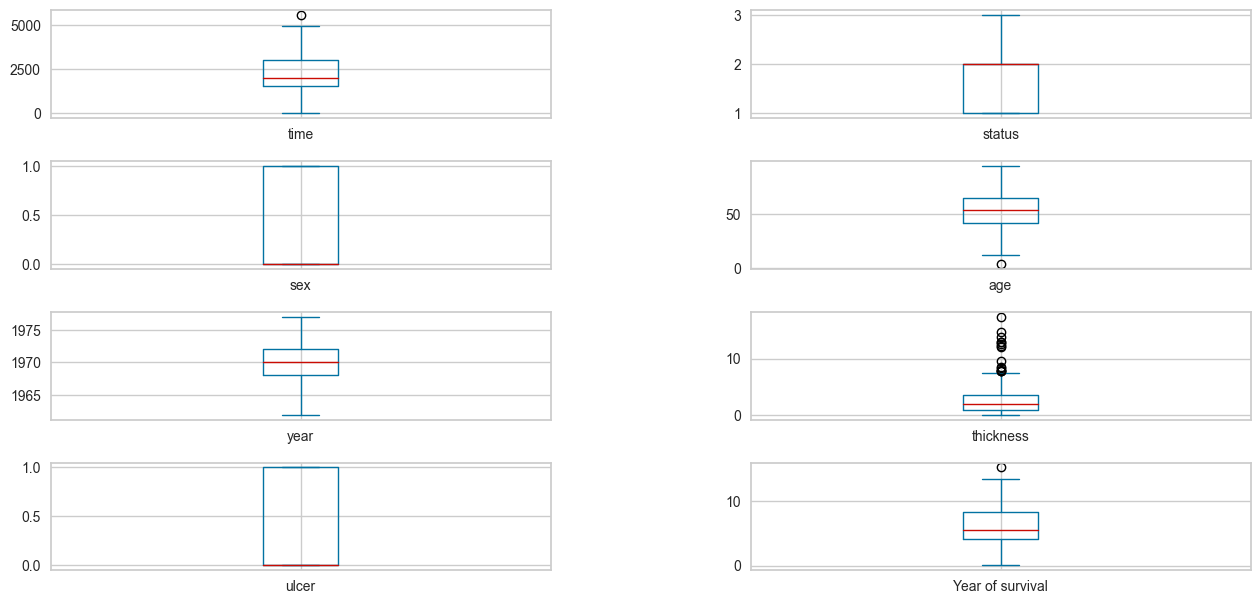

In [291]:
df.plot(kind='box', subplots=True, layout=(4,2), figsize=(15,7))

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

Observation: high amount of outliers in thickness

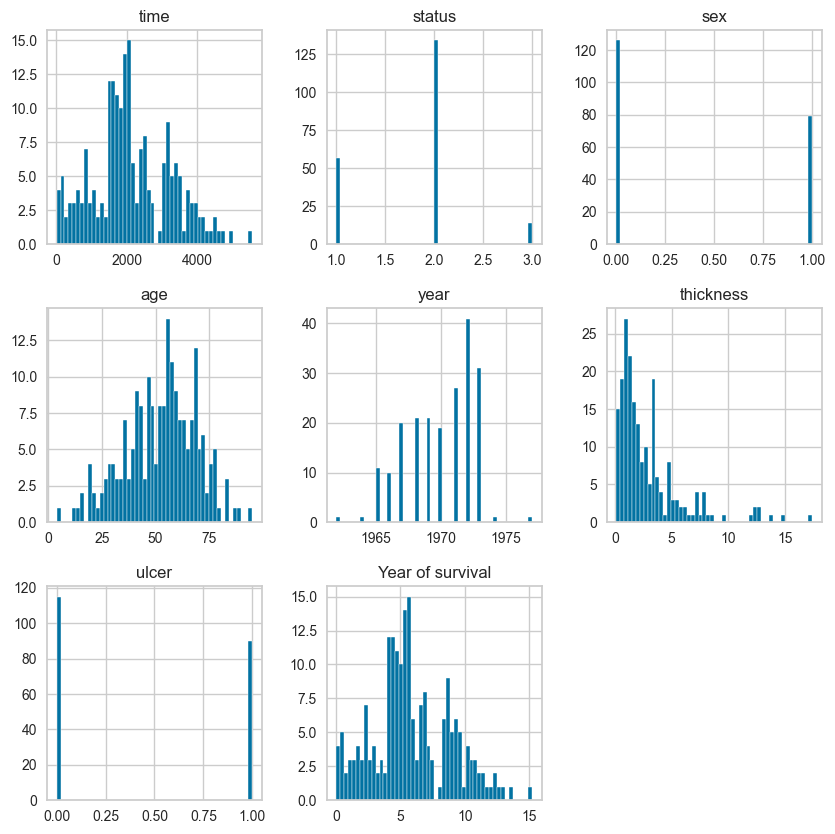

In [292]:
df.hist(bins=50, figsize=(10,10))
plt.show()

Age is slightly negative left skewed, the rest is all positive distribution 

In [293]:
5565/365

15.246575342465754

Min days of survival: 10 days
Max days of survival: 15 years

checking the variables

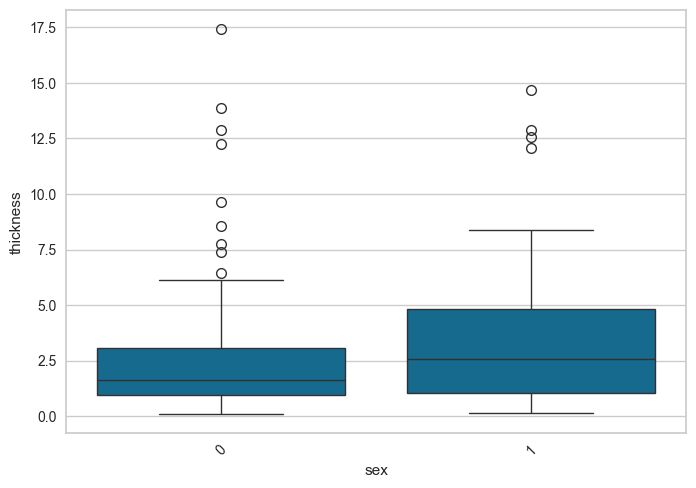

In [294]:
sns.boxplot(x='sex', y='thickness', data = df )
plt.xticks(rotation=45)
plt.show()

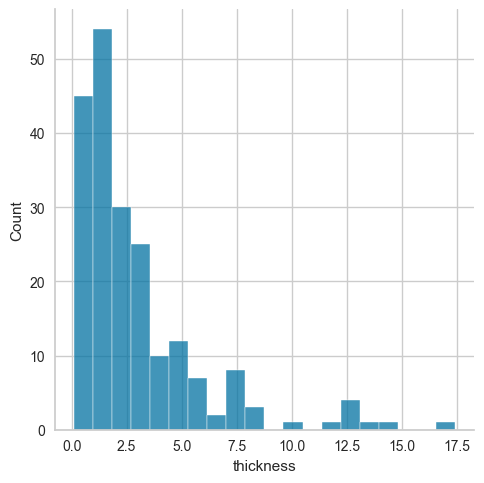

In [295]:
sns.displot(df['thickness'])

In [296]:
male = df[df['sex'] == 1 ]

In [297]:
male['thickness'].mean()

3.611139240506328

In [298]:
female = df[df['sex'] == 0 ]

In [299]:
female['thickness'].mean()

2.4864285714285708

Men usually has thicker tumour, the average thickness for men is 3.6 and for women 2.5

Most endangered ages: 45 - 70

In [361]:
mean_age = df['age'].mean()

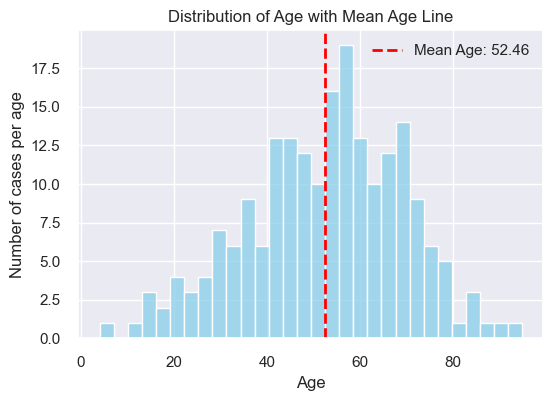

In [366]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=False, color='skyblue')

plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

plt.xlabel('Age')
plt.ylabel('Number of cases per age')
plt.title('Distribution of Age with Mean Age Line')
plt.legend()

plt.show()

In [301]:
df[df['ulcer'] == 0].count()

time                115
status              115
sex                 115
age                 115
year                115
thickness           115
ulcer               115
Year of survival    115
dtype: int64

In [302]:
115/205

0.5609756097560976

56% does not have any ucler, 44 had ulcer

### graphical summaries ### 

<Figure size 800x700 with 0 Axes>

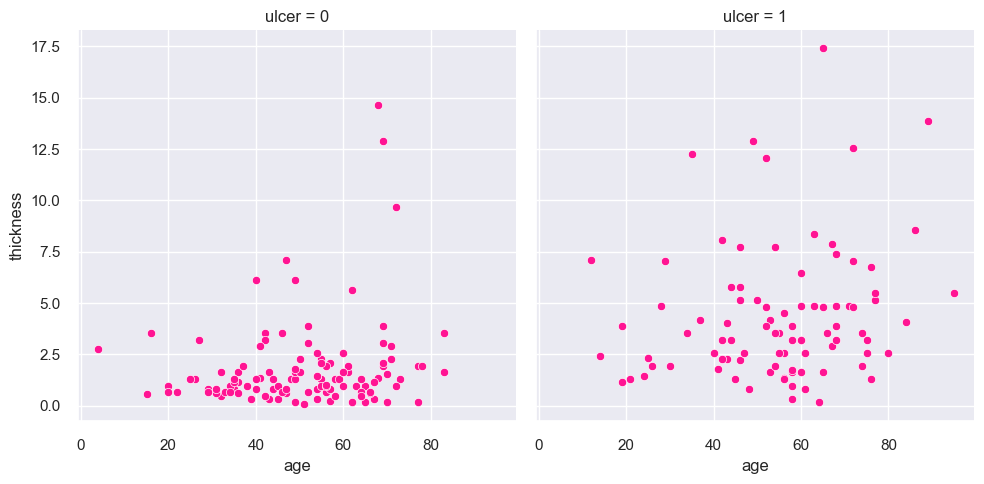

In [303]:
plt.figure(figsize = (8, 7))
sns.relplot(x='age', y = 'thickness',data = df,
            kind = 'scatter', col='ulcer', color='deeppink')
plt.show()

Generally we can say that who has less thick tumour they have less chance for ulcer.

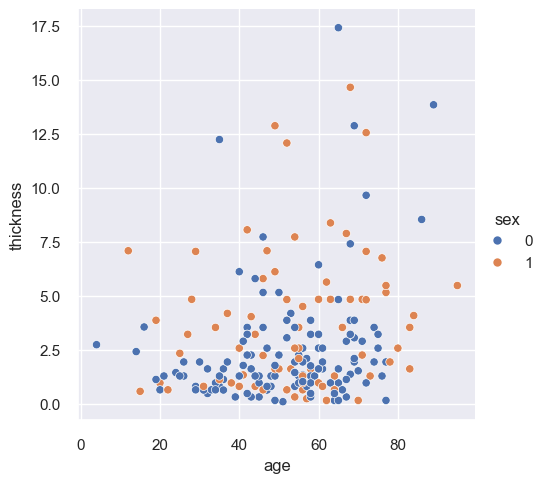

In [304]:
sns.relplot(x='age', y = 'thickness',data = df,
           kind = 'scatter',
           hue = 'sex') #status as well
plt.show()

In [305]:
death_categories = ['died from melanoma','alive', 'died unrelated melanoma']

In [306]:
values = [57,134,14]

In [307]:
colors = ['moccasin','lightpink','lightslategrey','chocolate']

([<matplotlib.patches.Wedge at 0x1d3c9829d10>,
 [Text(1.0957321468992642, -0.09680424707381939, 'died from melanoma'),
  Text(-1.0912202026724298, -0.13870280919844888, 'alive'),
  Text(0.5943824256047927, 0.9255860479351248, 'died unrelated melanoma')],
 [Text(0.6972840934813499, -0.06160270268333961, '27.80%'),
  Text(-0.6944128562460916, -0.08826542403537654, '65.37%'),
  Text(0.3782433617485044, 0.589009303231443, '6.83%')])

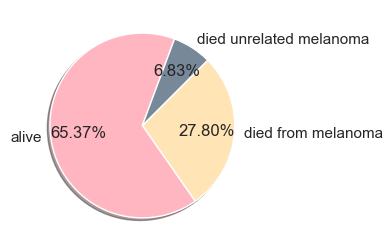

In [308]:
plt.pie(values, labels=death_categories, colors=colors, autopct='%.2f%%', pctdistance=0.7, startangle=45, shadow=True, counterclock=False) 

27% died from melanoma (57 out of 205)

Lets check those who died from melanoma

In [309]:
died_melanoma = df[df['status'] == 1]

In [310]:
died_melanoma['time'].head()

4    185
5    204
6    210
8    232
9    279
Name: time, dtype: int64

<AxesSubplot: xlabel='time', ylabel='Count'>

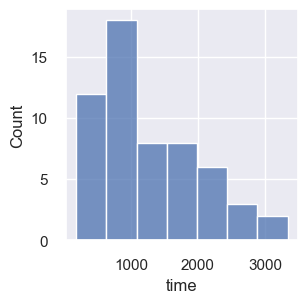

In [364]:
sns.histplot(died_melanoma['time'])

In [312]:
died_melanoma[died_melanoma['sex'] == 1].count()

time                29
status              29
sex                 29
age                 29
year                29
thickness           29
ulcer               29
Year of survival    29
dtype: int64

In [313]:
29/57

0.5087719298245614

In [314]:
total_male = 79
total_female = 126
deaths_male = 29
deaths_female = 28


In [315]:
probability_death_male = deaths_male / total_male
probability_death_female = deaths_female / total_female

In [316]:
probability_death_male

0.3670886075949367

In [317]:
probability_death_female

0.2222222222222222

Those who die from melanome usually die in the first 3 years, especially between 2-3 years. The range is from half a year to 9 years, however the chances are gradually higher and higher for the survival every year. 

In [318]:
died_melanoma[died_melanoma['ulcer'] == 1].count()

time                41
status              41
sex                 41
age                 41
year                41
thickness           41
ulcer               41
Year of survival    41
dtype: int64

In [319]:
died_melanoma[died_melanoma['ulcer'] == 0].count()

time                16
status              16
sex                 16
age                 16
year                16
thickness           16
ulcer               16
Year of survival    16
dtype: int64

In [320]:
died_melanoma.head()

,time,status,sex,age,year,thickness,ulcer,Year of survival
4,185,1,1,52,1965,12.08,1,0.506849
5,204,1,1,28,1971,4.84,1,0.558904
6,210,1,1,77,1972,5.16,1,0.575342
8,232,1,1,49,1968,12.88,1,0.635616
9,279,1,0,68,1971,7.41,1,0.764384


Those who died (41/57), 71% had ulcer, 29 did not have any

In [321]:
41/57

0.7192982456140351

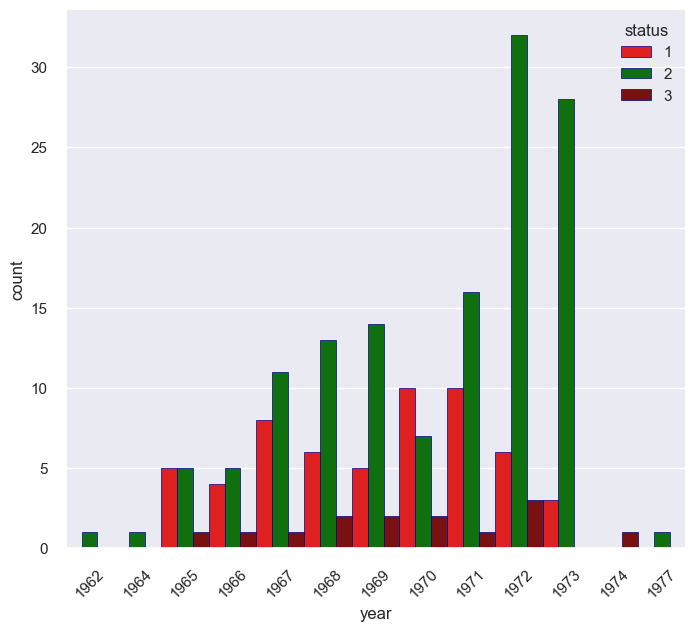

In [322]:
plt.figure(figsize = (8, 7))
custom_palette = {1: 'red', 2: 'green', 3: 'darkred'}
ax = sns.countplot(data=df, x=df['year'], color='pink', width=1, edgecolor='darkblue', lw=0.5, hue='status', palette=custom_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Definately there is a trend that the number and ratio of survivals were increasing during this period: in 1965-1967 the chances were equal

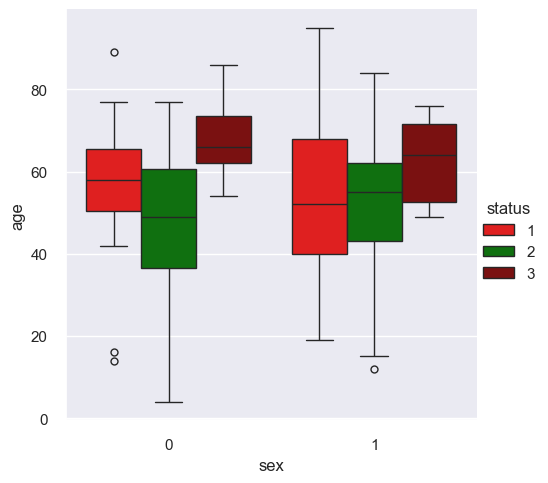

In [323]:
custom_palette = {1: 'red', 2: 'green', 3: 'darkred'}
g = sns.catplot(x="sex",
                y="age", data=df, 
                kind="box", hue="status", palette=custom_palette)

Lets check those who are alive 

In [324]:
alive = df[df['status'] == 2]

In [325]:
alive['Year of survival'].sort_values(ascending=True)

2       0.095890
45      4.106849
47      4.131507
48      4.136986
49      4.142466
         ...    
200    12.306849
201    12.789041
202    12.843836
203    13.495890
204    15.246575
Name: Year of survival, Length: 134, dtype: float64

There is only one person under 4 years - so its a good chance that these group will not die from melanoma related causes.

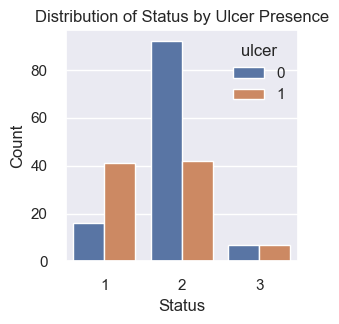

In [326]:
sns.countplot(x='status', hue='ulcer', data=df)

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status by Ulcer Presence')
plt.show()

Ulcer has no correlation with surival since many of the alive ones had ulcer

<AxesSubplot: xlabel='status', ylabel='thickness'>

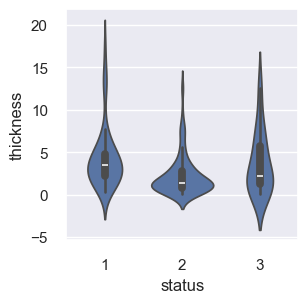

In [327]:
sns.violinplot(x='status', y='thickness', data=df)

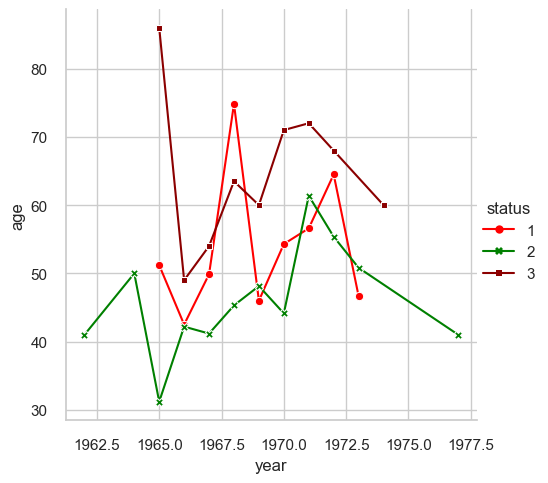

In [328]:
sns.set_style("whitegrid")
custom_palette = {1: 'red', 2: 'green', 3: 'darkred'}
sns.relplot(x='year', y='age', data=df, kind='line', errorbar=None, style ='status', hue='status', markers=True, dashes = False, palette=custom_palette)
plt.show()

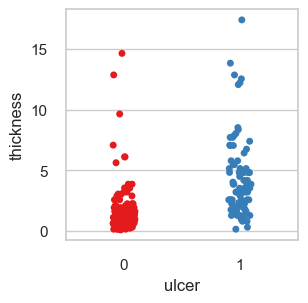

In [329]:
sns.stripplot(x='ulcer',
              y = 'thickness',
              data = df,
              palette= 'Set1')
plt.show()

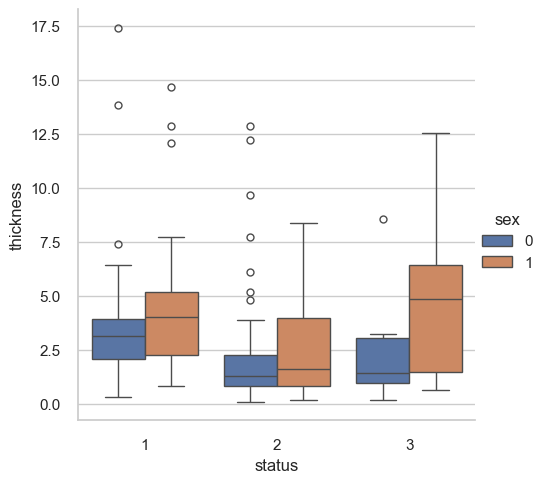

In [330]:
sns.catplot(x="status",
            y="thickness",
            data = df,
            kind = 'box',
            hue="sex",
            showfliers=True)
plt.show()

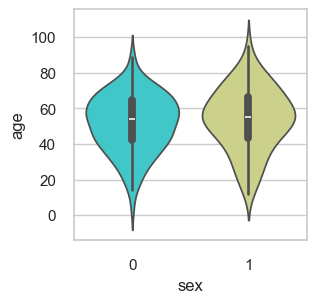

In [331]:
sns.violinplot(x="sex",
               y="age", 
               data=df,
               palette='rainbow')
plt.show()

### relationships ###

<AxesSubplot: >

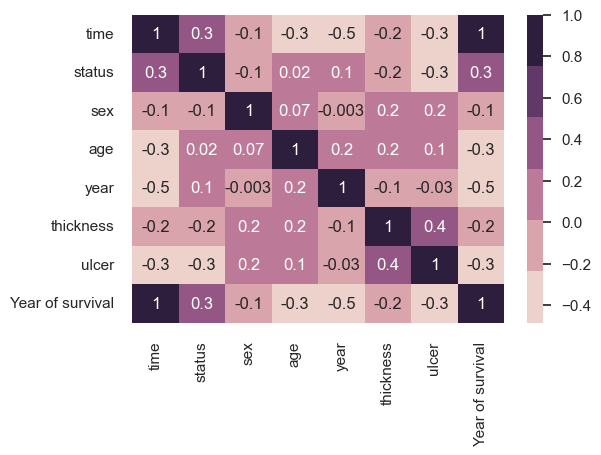

In [332]:
plt.figure(figsize = (6,4))
colormap = sns.cubehelix_palette()
sns.set(font_scale = 1.0)
sns.heatmap(df.corr(), annot=True,fmt='.1g', cmap=colormap)

In [333]:
corr = abs(pd.DataFrame(df.corr().status))
corr.sort_values(by='status', ascending=False)

,status
status,1.000000
time,0.316146
Year of survival,0.316146
ulcer,0.270326
thickness,0.204722
year,0.138167
sex,0.098967
age,0.015964


<AxesSubplot: >

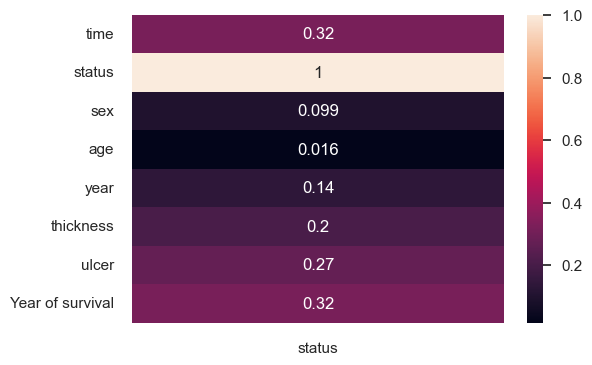

In [334]:
plt.figure(figsize = (6,4))
colormap = sns.cubehelix_palette()
sns.set(font_scale = 1.0)
sns.heatmap(corr, annot=True)


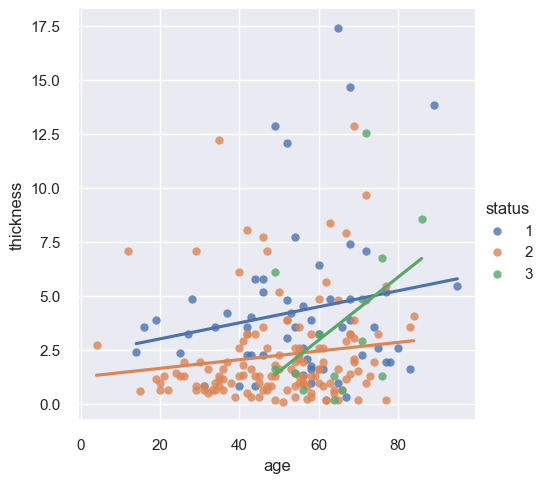

In [335]:
sns.lmplot(x="age",
           y="thickness",
           data=df,
          hue = "status", ci=None)
plt.show()
#To be deleted

In [336]:
df2 = df.copy()

In [337]:
df2['status'] = pd.Categorical(df2['status'])

In [338]:
X = df2.drop('status', axis=1)

In [339]:
y = df2['status']

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
from sklearn.ensemble import RandomForestClassifier

In [343]:
model= RandomForestClassifier()

In [344]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [345]:
feature_importances = model.feature_importances_

In [346]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [347]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

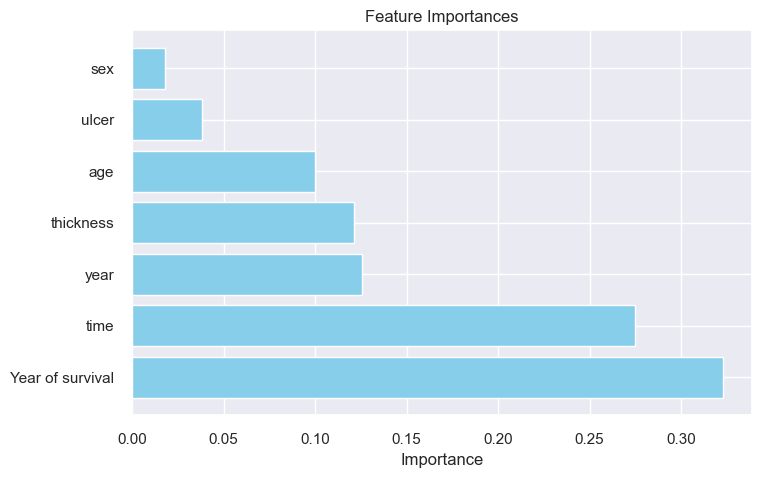

In [348]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [349]:
y_pred = model.predict(X_test)

In [350]:
from sklearn.metrics import accuracy_score

In [351]:
accuracy = accuracy_score(y_pred, y_test)

In [352]:
accuracy 

0.8292682926829268

In [353]:
from pycaret.classification import *

In [354]:
Step = setup(data=df, target='status')

,Description,Value
0,Session id,2614
1,Target,status
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(205, 8)"
5,Transformed data shape,"(205, 8)"
6,Transformed train set shape,"(143, 8)"
7,Transformed test set shape,"(62, 8)"
8,Numeric features,7
9,Preprocess,True


In [355]:
best_models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8805,0.9096,0.8805,0.8321,0.8533,0.7478,0.7582,0.0130
lda,Linear Discriminant Analysis,0.8738,0.9368,0.8738,0.8146,0.8408,0.7190,0.7355,0.0100
ridge,Ridge Classifier,0.8600,0.0000,0.8600,0.8027,0.8249,0.6812,0.7035,0.0120
lightgbm,Light Gradient Boosting Machine,0.8600,0.9227,0.8600,0.8306,0.8424,0.7061,0.7153,0.0670
catboost,CatBoost Classifier,0.8462,0.9330,0.8462,0.8105,0.8250,0.6717,0.6823,1.1120
gbc,Gradient Boosting Classifier,0.8390,0.9194,0.8390,0.8085,0.8210,0.6615,0.6709,0.0760
xgboost,Extreme Gradient Boosting,0.8386,0.9311,0.8386,0.8022,0.8166,0.6567,0.6688,0.0480
rf,Random Forest Classifier,0.8319,0.9317,0.8319,0.7852,0.8048,0.6358,0.6486,0.0740
et,Extra Trees Classifier,0.8257,0.9078,0.8257,0.8014,0.8091,0.6284,0.6400,0.0780
nb,Naive Bayes,0.7895,0.8649,0.7895,0.7513,0.7610,0.5498,0.5695,0.0140


In [356]:
qda = create_model("qda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.9091,0.9333,0.8800,0.9037,0.8571,0.8660
1,0.9333,0.8505,0.9333,0.8727,0.9016,0.8485,0.8616
2,0.8667,0.8121,0.8667,0.8061,0.8349,0.6970,0.7078
3,0.8571,0.8978,0.8571,0.7929,0.8233,0.6889,0.7002
4,0.8571,0.9582,0.8571,0.7929,0.8233,0.6889,0.7002
5,0.9286,1.0000,0.9286,0.8714,0.8968,0.8526,0.8625
6,0.8571,0.9346,0.8571,0.8333,0.8336,0.7200,0.7423
7,0.8571,0.9401,0.8571,0.8571,0.8571,0.7143,0.7143
8,0.7857,0.8484,0.7857,0.7429,0.7619,0.5579,0.5643


In [357]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [358]:
qda_tuned = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9333,0.9091,0.9333,0.8800,0.9037,0.8571,0.8660
1,0.9333,0.9143,0.9333,0.8727,0.9016,0.8485,0.8616
2,0.8667,0.8559,0.8667,0.8061,0.8349,0.6970,0.7078
3,0.7857,0.8747,0.7857,0.7690,0.7723,0.5484,0.5555
4,0.8571,0.9209,0.8571,0.7929,0.8233,0.6889,0.7002
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9286,0.9511,0.9286,0.8714,0.8968,0.8526,0.8625
7,0.8571,0.9621,0.8571,0.8571,0.8571,0.7143,0.7143
8,0.7857,0.7912,0.7857,0.7429,0.7619,0.5579,0.5643


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [359]:
evaluate_model(qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Inisght & recommendation ###

Total cases: 205
	Died from melanoma: 7%
	Alive: 65%
	Died from sg else: 28%
   
----------------------------------------------------
Female: 126 – 61%, probabilty_death_female: 22% --> women have slightly better chance for survival
Male: 79 – 39% , probability_death_male: 36%
        
        
Range of the time  after surgery:  10 days – 15 years (followup end time),
    no sense saying mean
    
Range of thickness: 0,1 – 17,5, with average 2,9
    Men usually has thicker tumour, the average thickness for men is 3.6 and for women 2.5
    Generally we can say that who has less thick tumour they have less chance for ulcer.
    
Range of age: 4 – 95, with average: 52
        Most endangered ages: 45 – 70
        
Ulcer:
        56% os the total did not have any ulcer
Those who died (41/57), 71% had ulcer, but ulcer has no correlation with surival since many of the alive ones had ulcer

Status: 
        27% died from melanoma (57 out of 205)
    Those who die from melanome usually die in the first 3 years, especially between 2-3 years. The range is from half a year to 9 years, however the chances are gradually higher and higher for the survival every year.
    Definately there is a trend that the number and ratio of survivals were increasing during this period: in 1965-1967 the chances were equal
    There is only one person under 4 years - so its a good chance that these group will not die from melanoma related causes.


Further analysis needed for the points:
    --> Men having thicker tumour 
    --> Women have slightly better chance for survival (regardless the thickness and ulcer)
    --> Lifestyle, sunbathing habits researches of the patients
    --> The most endangered age is from 45, but there are several cases of much younger patients, 
    the distribution of the age is almost normal distirbution which is quite worrying. 